## CNNs
- Weaknesses of MLPs
- Overview of CNN
  - Convoluntions
  - Pooling Layers
- Coding CNN
- Using GPU with CNN

## Why are MLPs not good for Image Data? 

A multi-layer perceptron is good with structured data.  They are not ideal for image data.  Why are they not ideal for image data? 

![mnist_1layer.png](mnist_1layer.png)
https://ml4a.github.io/ml4a/looking_inside_neural_nets/

It takes an image and it makes it one dimensional.  Images are 2 dimensional - we lose the ability to see how a cell above and below impact each other.  We still get good results with the MNIST dataset this is because all the numbers are in the middle of the screen.  

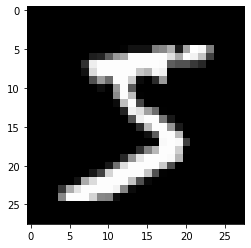

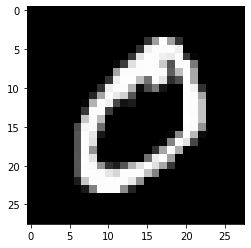

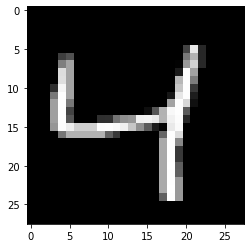

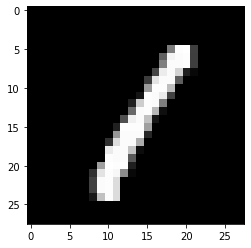

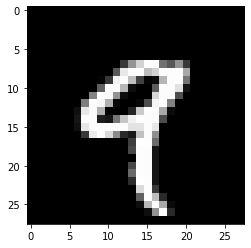

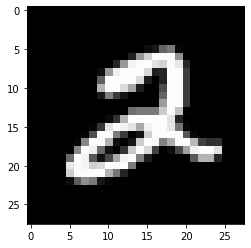

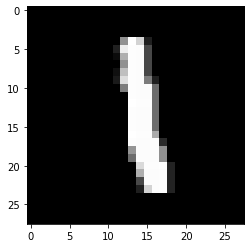

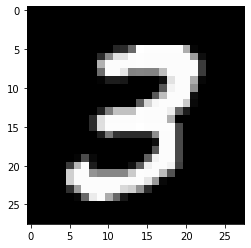

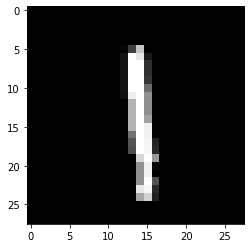

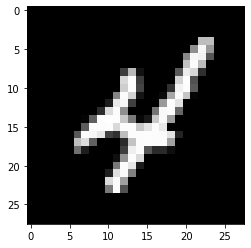

In [4]:
from keras.datasets import mnist 
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
for i in range(10):
    plt.imshow(train_images[i], cmap = 'gray')
    plt.show()

## Image Data
1. Still try out a MLP before a CNN.  They take a lot less time to train and you should always try simpiler method
2. If that give bad results try a CNN

## What is a CNN?

![Image_158CNN.png](Image_158CNN.png)

This is an example of a CNN.  We start with Convolutions, then do pooling, and end it with a MLP.  That is the fully connected layer.  Convolutions and Pooling think of that as feature engineering - creating features.  Remember Multi layer Perceptrons are good for structured data because we already have features.  With an image - we need to create features.  Again that is what the Convolutions and Pooling are doing.  If we're predicting a dog what are some features we would want?

- Eyes
- Ears
- Nose
- Hair
- Ect

## Convolutional Layer

![convolution-layer-a.png](convolution-layer-a.png)
[gif courtesy of Stanford University](https://stanford.edu/~shervine/teaching/cs-230/cheatsheet-convolutional-neural-networks)

Here is an example of a convolutional layer. The red box is our original image. We set a certain window size (which is the blue box) that goes through the red box.  The blue box has certain weights associated with it (that is why some of the blues boxes are darker).  We multiply the pixel by the weights and add them all together.  Think of this as a magnifying glass.  It's going to take a large image and highlight small things 

Lets see an example of this with actual numbers 

![cnn6.png](cnn6.png)
http://brohrer.github.io/how_convolutional_neural_networks_work.html

The original image is on the left.  We have a 3x3 window with the above weights in the middle.  These weights are looking for a diagnol line.  So if we put the patch on the top left.  We would get:
- -1 x 1 = -1
- -1 x -1 = 1
- -1 x -1 = 1
- -1 x -1 = 1
- 1 x 1 = 1
- -1 x -1 = 1
- -1 x -1 = 1
- -1 x -1 = 1
- 1 x 1 = 1

In [9]:
7 / 9 

0.7777777777777778

That is a single point for a single node in a CNN layer. Typically you have multiple layers and multiple nodes.  What you find is that when these are stacked you start with really simple features, like the above is looking for a single line.  You get to combining multiple lines into something meaningful 

![H12H6.png](Hl2H6.png )
http://robotics.stanford.edu/~ang/papers/icml09-ConvolutionalDeepBeliefNetworks.pdf

We start with simple lines and as we comine them we get eyes and noses or a wheel on car and then as we go further we combine eyes and nose to make a face.  

## Pooling Layers

![pool.png](pool.png)
http://brohrer.github.io/how_convolutional_neural_networks_work.html

Pooling shrinks down the size while minimizing information loss.  CNNs take a long time to train hours or days depending on the size - so anything to improve the speed is important 

## Coding in Action

In [11]:
from keras.datasets import fashion_mnist 

In [12]:
(train_images, train_labels), (test_images, test_labels)= fashion_mnist.load_data()

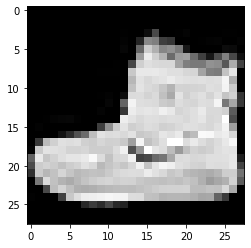

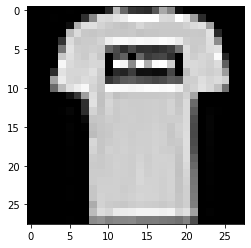

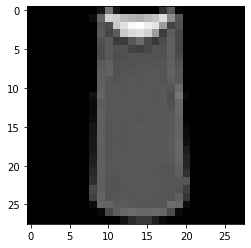

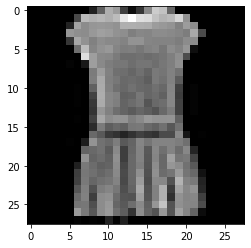

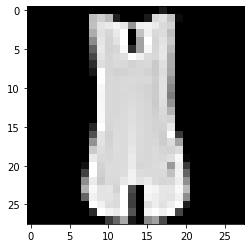

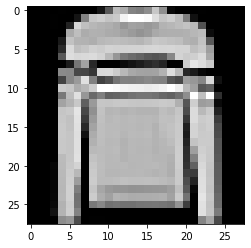

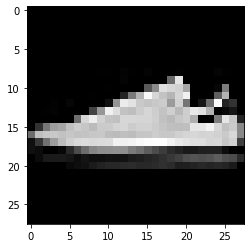

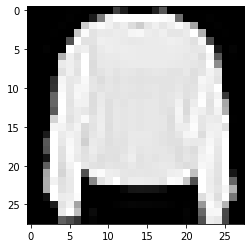

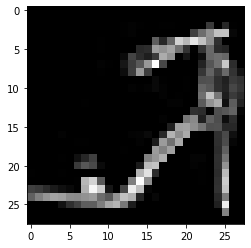

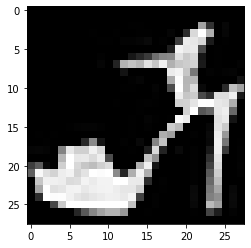

In [13]:
for i in range(10):
    plt.imshow(train_images[i], cmap = 'gray')
    plt.show()

I ran this last week with a MLP and got about 78% accuracy 

In [14]:
from keras import models 
from keras import layers 

In [22]:
train_images.shape, test_images.shape[1:]

((60000, 28, 28), (28, 28))

In [45]:
nn = models.Sequential()

nn.add(layers.Conv2D(32, (3, 3), input_shape = (28, 28, 1), activation = 'relu'))
nn.add(layers.MaxPooling2D(2, 2))

nn.add(layers.Conv2D(32, (3, 3), activation = 'relu'))
nn.add(layers.MaxPooling2D(2, 2))

nn.add(layers.Flatten())

nn.add(layers.Dense(10, activation='softmax'))

In [46]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [47]:
from keras.utils import to_categorical
train_labels_cat = to_categorical(train_labels)
test_labels_cat = to_categorical(test_labels)

In [48]:
nn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [49]:
nn.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                8010      
Total params: 17,578
Trainable params: 17,578
Non-trainable params: 0
__________________________________________________

In [50]:
nn.fit(train_images, train_labels_cat, epochs = 10, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
10336/48000 [=====>........................] - ETA: 12s - loss: 2.3644 - accuracy: 0.6674

KeyboardInterrupt: 

In [51]:
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

In [52]:
train_images.shape, test_images.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [53]:
import time

In [54]:
t0 = time.time()
nn_results = nn.fit(train_images, train_labels_cat, epochs = 10, validation_split=0.2)
t1 = time.time()

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 15s 315us/step - loss: 0.5127 - accuracy: 0.8211 - val_loss: 0.4503 - val_accuracy: 0.8418
Epoch 2/10
48000/48000 [==============================] - 15s 318us/step - loss: 0.3910 - accuracy: 0.8591 - val_loss: 0.4132 - val_accuracy: 0.8563
Epoch 3/10
48000/48000 [==============================] - 15s 317us/step - loss: 0.3552 - accuracy: 0.8710 - val_loss: 0.3651 - val_accuracy: 0.8686
Epoch 4/10
48000/48000 [==============================] - 15s 318us/step - loss: 0.3337 - accuracy: 0.8788 - val_loss: 0.3688 - val_accuracy: 0.8673
Epoch 5/10
48000/48000 [==============================] - 15s 314us/step - loss: 0.3213 - accuracy: 0.8843 - val_loss: 0.3645 - val_accuracy: 0.8747
Epoch 6/10
48000/48000 [==============================] - 15s 309us/step - loss: 0.3060 - accuracy: 0.8872 - val_loss: 0.3427 - val_accuracy: 0.8788
Epoch 7/10
48000/48000 [==============================] 

In [55]:
t1 - t0

148.68641185760498

https://www.kaggle.com/dansbecker/running-kaggle-kernels-with-a-gpu